# Capstone Project – The Battle of Neighborhoods | Finding a Nearest Place Based Crime Data in Toronto, Ontario

## 1. Introduction:

The purpose of this Project is to analyze crime incident around their venue. It will help people understanding which venue that have a high rate of crime in Toronto, Ontario, Canada.

This Project aim to create an analysis of features for a person to be carefully at venues as a comparative analysis between crimes incident place. The features include crime place, crime rates, date of incident. It will help people to anticipate possibility of crime near venues.



## 2. Data Section

Data Link: https://www.kaggle.com/kapastor/toronto-police-data-crime-rates-by-neighbourhood

Will use Toronto Police dataset which we downloaded from kaggle. Dataset consisting of latitude and longitude, years of incident, crime category.


#### Foursquare API Data:

We will need data about venues based on Toronto crime data. 
In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API. 

After finding the list of venues, we then connect to the Foursquare API to gather information about venues inside each and every crime incident. For each crime incident, we have chosen the radius to be 100 meter.

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of Toronto Police dataset. The information obtained per venue as follows:

    1. Neighborhood
    2. Neighborhood Latitude
    3. Neighborhood Longitude
    4. Venue
    5. Name of the venue e.g. the name of a store or restaurant
    6. Venue Latitude
    7. Venue Longitude
    8. Venue Category
    

## 3. Methodology Section

#### Clustering Approach:
To compare the similarities of two regions, we decided to explore neighborhoods, segment them, and group them into clusters to find similar neighborhoods in a big city like New York and San Francisco. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: k-means clustering algorithm


**Find the best K for K-Means with Elbow Method**

<img src="images/Elbow_method_for_optimal_K.png">



#### Work Flow:
Using credentials of Foursquare API features of near-by places of the neighborhoods would be mined. Due to http request limitations the number of places per neighborhood parameter would reasonably be set to 1000 and the radius parameter would be set to 100.


## 4. Results Section

**Map of Neighborhood in Toronto**
<img src="images/Map_of_Neighborhood_in _Toronto.png">



**Neighborhood with Crime Rate Score in Toronto**
<img src="images/Neighborhood_with_Crime_Rate_Score_in_Toronto.png">



**Crime Incident places by Clusters in Toronto**
<img src="images/Crime_Incidents_location_by_Clusters_in_Toronto.png">



#### The Location:
Scarborough is a popular destination for new immigrants in Canada to reside. As a result, it is one of the most diverse and multicultural areas in the Greater Toronto Area, being home to various religious groups and places of worship. Although immigration has become a hot topic over the past few years with more governments seeking more restrictions on immigrants and refugees, the general trend of immigration into Canada has been one of on the rise.

#### Foursquare API:
This project have used Four-square API as its prime data gathering source as it has a database of millions of places, especially their places API which provides the ability to perform location search, location sharing and details about a business.



## 5. Discussion Section

#### Problem to be resolved:
The major purpose of this project, is to segment a crime incident arround Toronto which happen in 2019. It will help peoples to anticipate possibility of crime when they go to some venue.

1. Which is the closest place to a crime?
2. What categories of crime are contain in each venues?
3. What is the most common crimes on each venues?



## 6. Conclusion Section

Conclusion: In this project, using k-means cluster algorithm I separated the crime incident into 10(Ten) different clusters and for 2150 different lattitude and logitude from dataset, which have very-similar crime incidents around them.

I feel rewarded with the efforts and believe this course with all the topics covered is well worthy of appreciation.
This project has shown me a practical application to resolve a real situation that has impacting personal and safety impact using Data Science tools.
The mapping with Folium is a very powerful technique to consolidate information and make the analysis and decision better with confidence.


#### Future Works:
This project can be continued for making it more precise in terms to analyze crime incident in Toronto for the next year (2020/2021). 


#### Libraries Used:

> Pandas: For creating and manipulating dataframes.

> Folium: Python visualization library would be used to visualize the neighborhoods cluster distribution of using interactive leaflet map.

> Scikit Learn: For importing k-means clustering.

> Geocoder: To retrieve Location Data.

> Matplotlib & Seaborn: Python Plotting Module.

> JSON: Library to handle JSON files.

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
from pandas.io.json import json_normalize
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Data Extraction and Cleaning

In [2]:
toronto_crime = pd.read_csv('gs://datasetsanalysis/MCI_2014_to_2019.csv')
toronto_crime.head()

X          Y  Index_ event_unique_id            occurrencedate  \
0 -79.405228  43.656982    7801  GO-20152165447  2015-12-18T03:58:00.000Z   
1 -79.307907  43.778732    7802  GO-20151417245  2015-08-15T21:45:00.000Z   
2 -79.225029  43.765942    7803  GO-20151421107  2015-08-16T16:00:00.000Z   
3 -79.140823  43.778648    7804  GO-20152167714  2015-11-26T13:00:00.000Z   
4 -79.288361  43.691235    7805  GO-20152169954  2015-12-18T19:50:00.000Z   

               reporteddate premisetype  ucr_code  ucr_ext  offence  ...  \
0  2015-12-18T03:59:00.000Z  Commercial      1430      100  Assault  ...   
1  2015-08-17T22:11:00.000Z  Commercial      1430      100  Assault  ...   
2  2015-08-18T14:40:00.000Z   Apartment      2120      200      B&E  ...   
3  2015-12-18T13:38:00.000Z       Other      2120      200      B&E  ...   
4  2015-12-18T19:55:00.000Z  Commercial      1430      100  Assault  ...   

   occurrencedayofyear occurrencedayofweek  occurrencehour              MCI  \
0                352.0          Friday                   3          Assault   
1                227.0          Saturday                21          Assault   
2                228.0          Sunday                  16  Break and Enter   
3                330.0          Thursday                13  Break and Enter   
4                352.0          Friday                  19          Assault   

  Division  Hood_ID                 Neighbourhood       Long        Lat  \
0      D14       79               University (79) -79.405228  43.656982   
1      D42      118  Tam O'Shanter-Sullivan (118) -79.307907  43.778732   
2      D43      137                  Woburn (137) -79.225029  43.765942   
3      D43      133  Centennial Scarborough (133) -79.140823  43.778648   
4      D55       61            Taylor-Massey (61) -79.288361  43.691235   

   ObjectId  
0      7001  
1      7002  
2      7003  
3      7004  
4      7005  

[5 rows x 29 columns]

Count Empty Record

In [3]:
toronto_crime.isna().sum()

X                       0
Y                       0
Index_                  0
event_unique_id         0
occurrencedate          0
reporteddate            0
premisetype             0
ucr_code                0
ucr_ext                 0
offence                 0
reportedyear            0
reportedmonth           0
reportedday             0
reporteddayofyear       0
reporteddayofweek       0
reportedhour            0
occurrenceyear         59
occurrencemonth        59
occurrenceday          59
occurrencedayofyear    59
occurrencedayofweek    59
occurrencehour          0
MCI                     0
Division                0
Hood_ID                 0
Neighbourhood           0
Long                    0
Lat                     0
ObjectId                0
dtype: int64

Drop unused dataframe column and drop duplicates

In [4]:
toronto_crime = toronto_crime.drop(columns={'event_unique_id','ucr_code', 'ucr_ext', 'X', 'Y'}, axis=1)

In [5]:
toronto_crime = toronto_crime.dropna().drop_duplicates()

In [6]:
toronto_crime.shape
toronto_crime.head()

Index_            occurrencedate              reporteddate premisetype  \
0    7801  2015-12-18T03:58:00.000Z  2015-12-18T03:59:00.000Z  Commercial   
1    7802  2015-08-15T21:45:00.000Z  2015-08-17T22:11:00.000Z  Commercial   
2    7803  2015-08-16T16:00:00.000Z  2015-08-18T14:40:00.000Z   Apartment   
3    7804  2015-11-26T13:00:00.000Z  2015-12-18T13:38:00.000Z       Other   
4    7805  2015-12-18T19:50:00.000Z  2015-12-18T19:55:00.000Z  Commercial   

   offence  reportedyear reportedmonth  reportedday  reporteddayofyear  \
0  Assault          2015      December           18                352   
1  Assault          2015        August           17                229   
2      B&E          2015        August           18                230   
3      B&E          2015      December           18                352   
4  Assault          2015      December           18                352   

  reporteddayofweek  ...  occurrencedayofyear  occurrencedayofweek  \
0        Friday      ...                352.0           Friday       
1        Monday      ...                227.0           Saturday     
2        Tuesday     ...                228.0           Sunday       
3        Friday      ...                330.0           Thursday     
4        Friday      ...                352.0           Friday       

  occurrencehour              MCI  Division Hood_ID  \
0              3          Assault       D14      79   
1             21          Assault       D42     118   
2             16  Break and Enter       D43     137   
3             13  Break and Enter       D43     133   
4             19          Assault       D55      61   

                  Neighbourhood       Long        Lat  ObjectId  
0               University (79) -79.405228  43.656982      7001  
1  Tam O'Shanter-Sullivan (118) -79.307907  43.778732      7002  
2                  Woburn (137) -79.225029  43.765942      7003  
3  Centennial Scarborough (133) -79.140823  43.778648      7004  
4            Taylor-Massey (61) -79.288361  43.691235      7005  

[5 rows x 24 columns]

Remove number value from Neighbourhood column

In [7]:
toronto_crime['Neighbourhood'] = toronto_crime.Neighbourhood.str.replace('(\(\d\))', '')
toronto_crime['Neighbourhood'] = toronto_crime.Neighbourhood.str.replace('(\(\d\d\))', '')
toronto_crime['Neighbourhood'] = toronto_crime.Neighbourhood.str.replace('(\(\d\d\d\))', '')
toronto_crime['Neighbourhood'] = toronto_crime.Neighbourhood.str.replace('(\(\d\d\d\d\))', '')
toronto_crime['Neighbourhood'] = toronto_crime.Neighbourhood.str.replace('-', ' ')
toronto_crime['Neighbourhood'] = toronto_crime['Neighbourhood'].apply(lambda x: x.strip())

Select row with year 2019

In [8]:
toronto_crime19 = toronto_crime[toronto_crime['occurrenceyear'] == 2019]
toronto_crime19.head(10)

Index_            occurrencedate              reporteddate  \
126001  131401  2019-03-20T21:56:00.000Z  2019-03-20T21:56:00.000Z   
126004  131601  2019-06-14T00:09:00.000Z  2019-06-14T00:09:00.000Z   
126023  131819  2019-01-03T02:15:00.000Z  2019-01-03T02:15:00.000Z   
126024  131820  2019-01-04T20:34:00.000Z  2019-01-04T20:34:00.000Z   
126025  131821  2019-01-05T20:41:00.000Z  2019-01-05T20:41:00.000Z   
126026  131822  2019-01-11T18:00:00.000Z  2019-01-11T22:32:00.000Z   
126027  131823  2019-01-27T04:10:00.000Z  2019-01-27T10:23:00.000Z   
126028  131301  2019-02-28T13:05:00.000Z  2019-02-28T13:12:00.000Z   
126032  131824  2019-06-18T08:00:00.000Z  2019-06-28T12:03:00.000Z   
126033  131825  2019-06-27T09:00:00.000Z  2019-06-28T14:26:00.000Z   

       premisetype                         offence  reportedyear  \
126001     Outside   Discharge Firearm With Intent          2019   
126004   Apartment             Assault With Weapon          2019   
126023  Commercial              Robbery - Business          2019   
126024   Apartment  Assault - Resist/ Prevent Seiz          2019   
126025     Outside  Discharge Firearm - Recklessly          2019   
126026     Outside              Pointing A Firearm          2019   
126027  Commercial                             B&E          2019   
126028     Outside             Assault With Weapon          2019   
126032  Commercial                             B&E          2019   
126033   Apartment             Assault Bodily Harm          2019   

       reportedmonth  reportedday  reporteddayofyear reporteddayofweek  ...  \
126001         March           20                 79        Wednesday   ...   
126004          June           14                165        Friday      ...   
126023       January            3                  3        Thursday    ...   
126024       January            4                  4        Friday      ...   
126025       January            5                  5        Saturday    ...   
126026       January           11                 11        Friday      ...   
126027       January           27                 27        Sunday      ...   
126028      February           28                 59        Thursday    ...   
126032          June           28                179        Friday      ...   
126033          June           28                179        Friday      ...   

        occurrencedayofyear  occurrencedayofweek occurrencehour  \
126001                 79.0           Wednesday              21   
126004                165.0           Friday                  0   
126023                  3.0           Thursday                2   
126024                  4.0           Friday                 20   
126025                  5.0           Saturday               20   
126026                 11.0           Friday                 18   
126027                 27.0           Sunday                  4   
126028                 59.0           Thursday               13   
126032                169.0           Tuesday                 8   
126033                178.0           Thursday                9   

                    MCI  Division Hood_ID           Neighbourhood       Long  \
126001          Assault       D42     132                 Malvern -79.227135   
126004          Assault       D32      39    Bedford Park Nortown -79.415932   
126023          Robbery       D22      10      Princess Rosethorn -79.555473   
126024          Assault       D11      86            Roncesvalles -79.435364   
126025          Assault       D42     118  Tam O'Shanter Sullivan -79.322212   
126026          Assault       D51      73               Moss Park -79.373459   
126027  Break and Enter       D22      19             Long Branch -79.532402   
126028          Assault       D51      75   Church Yonge Corridor -79.384155   
126032  Break and Enter       D31      26    Downsview Roding CFB -79.526596   
126033          Assault       D13     109      Caledonia Fairbank -79.452797   


Group dataframe based on Neighbourhood, Latitude, Longitude, and then join MCI/offence row with comma separated

In [9]:
toronto_crime19_grouped = toronto_crime19.groupby(['Neighbourhood', 'Lat', 'Long'])['MCI'].apply(', '.join).reset_index()
toronto_crime19_grouped2 = toronto_crime19.groupby(['Neighbourhood', 'Lat', 'Long'])['offence'].apply(', '.join).reset_index()

In [10]:
toronto_crime19_grouped.head(10)

Neighbourhood        Lat       Long  \
0  Agincourt North  43.790581 -79.269959   
1  Agincourt North  43.795204 -79.264580   
2  Agincourt North  43.796127 -79.261513   
3  Agincourt North  43.798115 -79.269623   
4  Agincourt North  43.798359 -79.270569   
5  Agincourt North  43.798409 -79.273369   
6  Agincourt North  43.798759 -79.281586   
7  Agincourt North  43.799198 -79.271431   
8  Agincourt North  43.799233 -79.282234   
9  Agincourt North  43.799549 -79.266716   

                                                MCI  
0                          Assault, Break and Enter  
1  Break and Enter, Assault, Auto Theft, Auto Theft  
2                                        Auto Theft  
3                                           Robbery  
4     Assault, Break and Enter, Assault, Auto Theft  
5                                   Break and Enter  
6                                        Auto Theft  
7    Auto Theft, Auto Theft, Auto Theft, Auto Theft  
8                                   Break and Enter  
9                                           Assault

In [11]:
toronto_crime19_grouped2.head()

Neighbourhood        Lat       Long  \
0  Agincourt North  43.790581 -79.269959   
1  Agincourt North  43.795204 -79.264580   
2  Agincourt North  43.796127 -79.261513   
3  Agincourt North  43.798115 -79.269623   
4  Agincourt North  43.798359 -79.270569   

                                             offence  
0                                       Assault, B&E  
1  B&E, Assault, Theft Of Motor Vehicle, Theft Of...  
2                             Theft Of Motor Vehicle  
3                             Robbery - Purse Snatch  
4      Assault, B&E, Assault, Theft Of Motor Vehicle

In [12]:
toronto_crime19_grouped['Neighbourhood'].value_counts().head(10)

West Humber Clairville                 283
Islington City Centre West             196
Waterfront Communities The Island      192
Downsview Roding CFB                   182
Rouge                                  173
Malvern                                172
York University Heights                164
Woburn                                 148
South Riverdale                        147
Dovercourt Wallace Emerson Junction    145
Name: Neighbourhood, dtype: int64

Get dummies from offence column for summing crime score

In [13]:
toronto_crime19_onehot = pd.concat([toronto_crime19_grouped2.drop('offence', 1), toronto_crime19_grouped2['offence'].str.get_dummies(sep=",")], 1)

In [14]:
toronto_crime19_onehot.head()

Neighbourhood        Lat       Long   Administering Noxious Thing  \
0  Agincourt North  43.790581 -79.269959                             0   
1  Agincourt North  43.795204 -79.264580                             0   
2  Agincourt North  43.796127 -79.261513                             0   
3  Agincourt North  43.798115 -79.269623                             0   
4  Agincourt North  43.798359 -79.270569                             0   

    Aggravated Aslt Peace Officer   Aggravated Assault  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

    Aggravated Assault Avails Pros   Air Gun Or Pistol: Bodily Harm   Assault  \
0                                0                                0         0   
1                                0                                0         1   
2                                0                                0         0   
3                                0                                0         0   
4                                0                                0         1   

    Assault - Force/Thrt/Impede  ...  Theft From Mail / Bag / Key  \
0                             0  ...                            0   
1                             0  ...                            0   
2                             0  ...                            0   
3                             0  ...                            0   
4                             0  ...                            0   

   Theft From Motor Vehicle Over  Theft Of Motor Vehicle  Theft Over  \
0                              0                       0           0   
1                              0                       0           0   
2                              0                       1           0   
3                              0                       0           0   
4                              0                       0           0   

   Theft Over - Bicycle  Theft Over - Distraction  Theft Over - Shoplifting  \
0                     0                         0                         0   
1                     0                         0                         0   
2                     0                         0                         0   
3                     0                         0                         0   
4                     0                         0                         0   

   Unlawfully Causing Bodily Harm  Unlawfully In Dwelling-House  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   Use Firearm / Immit Commit Off  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0  

[5 rows x 91 columns]

In [15]:
count_onehot = toronto_crime19_onehot.drop(columns={'Neighbourhood', 'Lat', 'Long'}, axis=1)
toronto_crime19_onehot['Crime Score'] = count_onehot.sum(axis=1)

In [16]:
toronto_crime19_onehot.head()

Neighbourhood        Lat       Long   Administering Noxious Thing  \
0  Agincourt North  43.790581 -79.269959                             0   
1  Agincourt North  43.795204 -79.264580                             0   
2  Agincourt North  43.796127 -79.261513                             0   
3  Agincourt North  43.798115 -79.269623                             0   
4  Agincourt North  43.798359 -79.270569                             0   

    Aggravated Aslt Peace Officer   Aggravated Assault  \
0                               0                    0   
1                               0                    0   
2                               0                    0   
3                               0                    0   
4                               0                    0   

    Aggravated Assault Avails Pros   Air Gun Or Pistol: Bodily Harm   Assault  \
0                                0                                0         0   
1                                0                                0         1   
2                                0                                0         0   
3                                0                                0         0   
4                                0                                0         1   

    Assault - Force/Thrt/Impede  ...  Theft From Motor Vehicle Over  \
0                             0  ...                              0   
1                             0  ...                              0   
2                             0  ...                              0   
3                             0  ...                              0   
4                             0  ...                              0   

   Theft Of Motor Vehicle  Theft Over  Theft Over - Bicycle  \
0                       0           0                     0   
1                       0           0                     0   
2                       1           0                     0   
3                       0           0                     0   
4                       0           0                     0   

   Theft Over - Distraction  Theft Over - Shoplifting  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Unlawfully Causing Bodily Harm  Unlawfully In Dwelling-House  \
0                               0                             0   
1                               0                             0   
2                               0                             0   
3                               0                             0   
4                               0                             0   

   Use Firearm / Immit Commit Off  Crime Score  
0                               0            2  
1                               0            3  
2                               0            1  
3                               0            1  
4                               0            4  

[5 rows x 92 columns]

In [17]:
toronto_crime19_score = toronto_crime19_onehot.groupby('Neighbourhood').agg({'Crime Score': 'sum'}).reset_index()

In [18]:
toronto_crime19_score

Neighbourhood  Crime Score
0                 Agincourt North          164
1    Agincourt South Malvern West          219
2                       Alderwood           79
3                           Annex          371
4               Banbury Don Mills          178
..                            ...          ...
135                      Wychwood          109
136                Yonge Eglinton          106
137                Yonge St.Clair           64
138       York University Heights          438
139            Yorkdale Glen Park          265

[140 rows x 2 columns]

### 3. Visualization

Get Toronto latitude and longitude using geolocator

In [19]:
address = 'Toronto'
geolocator = Nominatim(user_agent="coursera")
location = geolocator.geocode(address)
latitude_x = location.latitude
longitude_x = location.longitude
print('Coordinates of {} : {}, {}'.format(address, latitude_x, longitude_x))

Coordinates of Toronto : 43.6534817, -79.3839347


Import Open Cage Geocode library to retreive each latitude and longitude data from dataframe

In [20]:
from opencage.geocoder import OpenCageGeocode

Calling for API

In [21]:
key = '5d96xxxxxxxxxxxxxxxxxxx2a9121c1e'  # get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

Make request to API

In [22]:
list_lat = []   # create empty lists

list_long = []



for index, row in toronto_crime19_score.iterrows(): # iterate over rows in dataframe



    City = row['Neighbourhood']
    State = 'Toronto'      
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)


# create new columns from lists    

toronto_crime19_score['lat'] = list_lat   

toronto_crime19_score['lon'] = list_long

In [23]:
toronto_crime19_score.head(10)

Neighbourhood  Crime Score        lat        lon
0               Agincourt North          164  43.808038 -79.266439
1  Agincourt South Malvern West          219  43.795223 -79.260241
2                     Alderwood           79  43.601717 -79.545232
3                         Annex          371  43.670338 -79.407117
4             Banbury Don Mills          178  43.734804 -79.357243
5                Bathurst Manor           95  43.763893 -79.456367
6           Bay Street Corridor          536  43.665272 -79.387531
7               Bayview Village          125  43.769197 -79.376662
8         Bayview Woods Steeles           72  43.798127 -79.382973
9          Bedford Park Nortown          207  43.700110 -79.416300

Visalizing crime rate score with seaborn bar plot

[Text(0, 0, 'Agincourt North'),
 Text(1, 0, 'Agincourt South Malvern West'),
 Text(2, 0, 'Alderwood'),
 Text(3, 0, 'Annex'),
 Text(4, 0, 'Banbury Don Mills'),
 Text(5, 0, 'Bathurst Manor'),
 Text(6, 0, 'Bay Street Corridor'),
 Text(7, 0, 'Bayview Village'),
 Text(8, 0, 'Bayview Woods Steeles'),
 Text(9, 0, 'Bedford Park Nortown'),
 Text(10, 0, 'Beechborough Greenbrook'),
 Text(11, 0, 'Bendale'),
 Text(12, 0, 'Birchcliffe Cliffside'),
 Text(13, 0, 'Black Creek'),
 Text(14, 0, 'Blake Jones'),
 Text(15, 0, 'Briar Hill Belgravia'),
 Text(16, 0, 'Bridle Path Sunnybrook York Mills'),
 Text(17, 0, 'Broadview North'),
 Text(18, 0, 'Brookhaven Amesbury'),
 Text(19, 0, 'Cabbagetown South St.James Town'),
 Text(20, 0, 'Caledonia Fairbank'),
 Text(21, 0, 'Casa Loma'),
 Text(22, 0, 'Centennial Scarborough'),
 Text(23, 0, 'Church Yonge Corridor'),
 Text(24, 0, 'Clairlea Birchmount'),
 Text(25, 0, 'Clanton Park'),
 Text(26, 0, 'Cliffcrest'),
 Text(27, 0, 'Corso Italia Davenport'),
 Text(28, 0, 'Danfo

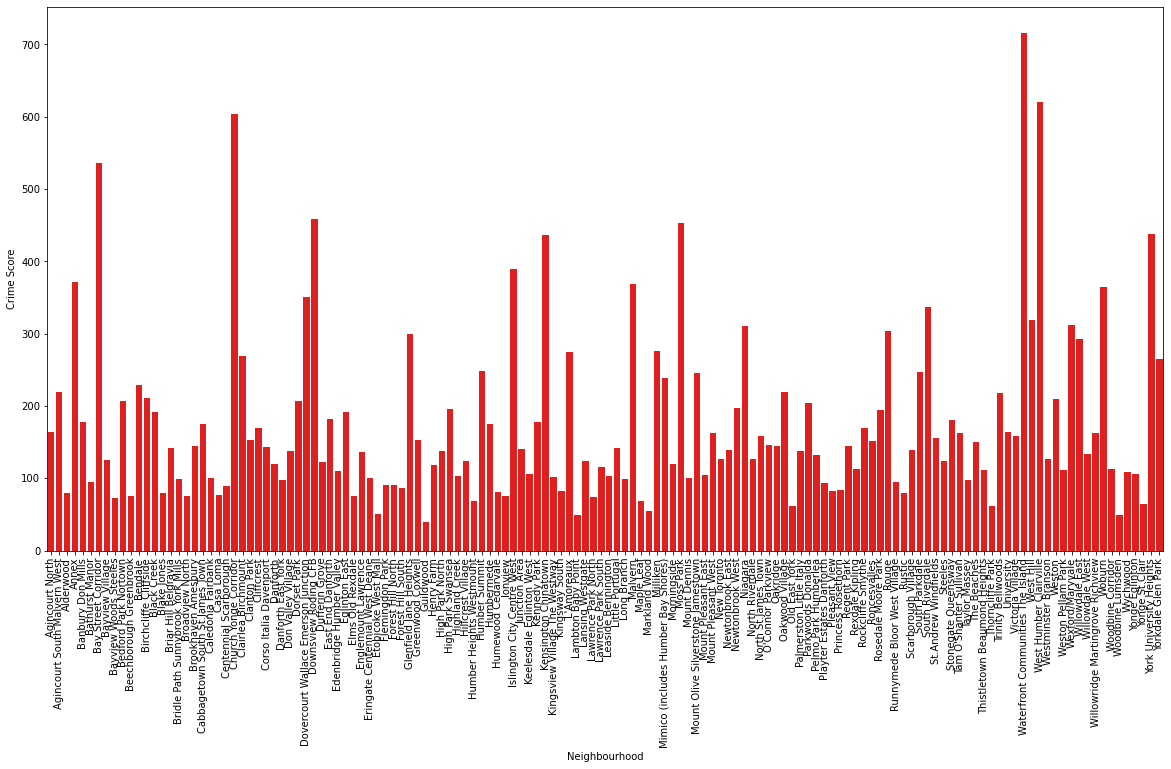

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x='Neighbourhood', 
            y='Crime Score', 
            palette=['r'],
            data=toronto_crime19_score)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Map of Neighborhood in Toronto

In [25]:
toronto_map = folium.Map(location = [latitude_x, longitude_x], zoom_star=10)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(toronto_crime19_score.lat, toronto_crime19_score.lon):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(toronto_crime19_score.lat)
longitudes = list(toronto_crime19_score.lon)
labels = list(toronto_crime19_score['Neighbourhood'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(toronto_map)    
    
# add incidents to map
toronto_map.add_child(incidents)

Calling Foursquare API

In [ ]:
CLIENT_ID = 'DJH0X00QRTxxxxxxxxxxxxxxxxxxxFLI2UHLFIIT3H2'
CLIENT_SECRET = 'OXDVPEOxxxxxxxxxxxxxxxxxxxxPWDKRAQJC0FPATKBJBPZ4AK'
VERSION = '20180604'
LIMIT = 30
print('Your credentials:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

In [27]:
radius = 700
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    latitude_x,
    longitude_x,
    radius,
    LIMIT
    )
results = requests.get(url).json()

#### Nearby Venues/ Location

In [28]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


referralId  reasons.count  \
0    e-0-5227bb01498e17bf485e6202-0              0   
1    e-0-4ad4c05ef964a520a6f620e3-1              0   
2    e-0-4ae7b27df964a52068ad21e3-2              0   
3    e-0-4b2a6eb8f964a52012a924e3-3              0   
4    e-0-537773d1498e74a75bb75c1e-4              0   
..                              ...            ...   
95  e-0-5c9aaa3f66f3cd002c95bd58-95              0   
96  e-0-559a8f5a498e31f945041245-96              0   
97  e-0-4b8eaea1f964a520b03033e3-97              0   
98  e-0-4b9e7418f964a52032e536e3-98              0   
99  e-0-5a1df4408ad62e3314313889-99              0   

                                        reasons.items  \
0   [{'summary': 'This spot is popular', 'type': '...   
1   [{'summary': 'This spot is popular', 'type': '...   
2   [{'summary': 'This spot is popular', 'type': '...   
3   [{'summary': 'This spot is popular', 'type': '...   
4   [{'summary': 'This spot is popular', 'type': '...   
..                                                ...   
95  [{'summary': 'This spot is popular', 'type': '...   
96  [{'summary': 'This spot is popular', 'type': '...   
97  [{'summary': 'This spot is popular', 'type': '...   
98  [{'summary': 'This spot is popular', 'type': '...   
99  [{'summary': 'This spot is popular', 'type': '...   

                    venue.id                         venue.name  \
0   5227bb01498e17bf485e6202                   Downtown Toronto   
1   4ad4c05ef964a520a6f620e3             Nathan Phillips Square   
2   4ae7b27df964a52068ad21e3                            Japango   
3   4b2a6eb8f964a52012a924e3                             Indigo   
4   537773d1498e74a75bb75c1e  Eggspectation Bell Trinity Square   
..                       ...                                ...   
95  5c9aaa3f66f3cd002c95bd58              Hakata Ikkousha Ramen   
96  559a8f5a498e31f945041245                              Maman   
97  4b8eaea1f964a520b03033e3                      Booster Juice   
98  4b9e7418f964a52032e536e3                         Second Cup   
99  5a1df4408ad62e3314313889                  Craft Beer Market   

    venue.location.lat  venue.location.lng  \
0            43.653232          -79.385296   
1            43.652270          -79.383516   
2            43.655268          -79.385165   
3            43.653515          -79.380696   
4            43.653144          -79.381980   
..                 ...                 ...   
95           43.650299          -79.388753   
96           43.648309          -79.382253   
97           43.652658          -79.378459   
98           43.656027          -79.380575   
99           43.649872          -79.378398   

                        venue.location.labeledLatLngs  \
0   [{'label': 'display', 'lat': 43.65323167517444...   
1   [{'label': 'display', 'lat': 43.65227047322295...   
2   [{'label': 'display', 'lat': 43.65526771691681...   
3   [{'label': 'display', 'lat': 43.65351471121164...   
4   [{'label': 'display', 'lat': 43.65314383888587...   
..                                                ...   
95  [{'label': 'display', 'lat': 43.650299, 'lng':...   
96  [{'label': 'display', 'lat': 43.64830873804684...   
97  [{'label': 'display', 'lat': 43.65265752, 'lng...   
98  [{'label': 'display', 'lat': 43.65602745564191...   
99  [{'label': 'display', 'lat': 43.6498722789121,...   

    venue.location.distance venue.location.cc  ...  \
0                       113                CA  ...   
1                       138                CA  ...   
2                       222                CA  ...   
3                       260                CA  ...   
4                       161                CA  ...   
..                      ...               ...  ...   
95                      525                CA  ...   
96                      591                CA  ...   
97                      450                CA  ...   
98                      391                CA  ...   
99                      600                CA  ...   


In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Categories of Nearby Venues/Locations

In [30]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
nearby_venues.head()

name        categories        lat        lng
0                   Downtown Toronto      Neighborhood  43.653232 -79.385296
1             Nathan Phillips Square             Plaza  43.652270 -79.383516
2                            Japango  Sushi Restaurant  43.655268 -79.385165
3                             Indigo         Bookstore  43.653515 -79.380696
4  Eggspectation Bell Trinity Square    Breakfast Spot  43.653144 -79.381980

In [31]:
print('{} nearby venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 nearby venues were returned by Foursquare.


In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=100):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name,
            lat,
            lng,
            v['venue']['name'],
            v['venue']['location']['lat'],
            v['venue']['location']['lng'],
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame ([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Neighborhood Latitude',
                             'Neighborhood Longitude',
                             'Venue',
                             'Venue Latitude',
                             'Venue Longitude',
                             'Venue Category']
    return(nearby_venues)

#### Due the limitation in the Foursquare API call, we take 1000 data samples

In [100]:
chosen_idx = np.random.choice(len(toronto_crime19_grouped2), replace=False, size=1000)
toronto_crime19_venues = toronto_crime19_grouped2.iloc[chosen_idx]
toronto_crime19_venues

Neighbourhood        Lat       Long  \
8563        Trinity Bellwoods  43.646683 -79.406578   
4716               L'Amoreaux  43.795872 -79.307846   
1665    Church Yonge Corridor  43.653171 -79.375771   
5067       Leaside Bennington  43.717308 -79.359261   
5268                  Malvern  43.804539 -79.207504   
...                       ...        ...        ...   
8122                  Steeles  43.816147 -79.322540   
8574        Trinity Bellwoods  43.647823 -79.424110   
871   Beechborough Greenbrook  43.690685 -79.472740   
8653               University  43.660126 -79.396805   
6136         Newtonbrook East  43.785614 -79.400162   

                                                offence  
8563  B&E, Robbery - Business, B&E, Assault Peace Of...  
4716  Robbery - Mugging, Robbery - Other, B&E, Assau...  
1665  Assault Bodily Harm, Assault, Assault, B&E, As...  
5067                                       B&E, Assault  
5268           Assault, Assault, Theft Of Motor Vehicle  
...                                                 ...  
8122                                   Assault, Assault  
8574                                           B&E, B&E  
871                   Assault With Weapon, B&E W'Intent  
8653                                   Assault, Assault  
6136                                Assault With Weapon  

[1000 rows x 4 columns]

In [104]:
toronto_crime19_venues.to_csv('toronto_crime19_venues_2.csv')

Load Neighborhood by nearby venues

In [103]:
toronto_crime_venues = getNearbyVenues(names=toronto_crime19_venues['Neighbourhood'],
                                    latitudes=toronto_crime19_venues['Lat'],
                                    longitudes=toronto_crime19_venues['Long'])

Trinity Bellwoods
L'Amoreaux
Church Yonge Corridor
Leaside Bennington
Malvern
Hillcrest Village
Humber Heights Westmount
Stonegate Queensway
Rexdale Kipling
Mimico (includes Humber Bay Shores)
Cabbagetown South St.James Town
Morningside
Woburn
Woburn
Kingsway South
Mount Pleasant West
Islington City Centre West
South Riverdale
Moss Park
Scarborough Village
Weston Pellam Park
Danforth East York
Weston
Yorkdale Glen Park
Woburn
Bendale
South Parkdale
Elms Old Rexdale
Mount Dennis
East End Danforth
Yonge St.Clair
Humewood Cedarvale
East End Danforth
Agincourt South Malvern West
Tam O'Shanter Sullivan
Islington City Centre West
Lansing Westgate
Humber Summit
Malvern
Milliken
Playter Estates Danforth
Woburn
Oakwood Village
West Humber Clairville
Elms Old Rexdale
L'Amoreaux
St.Andrew Windfields
Mount Pleasant West
Newtonbrook West
Forest Hill South
Mount Pleasant West
Princess Rosethorn
Lawrence Park North
Scarborough Village
Rexdale Kipling
West Humber Clairville
Stonegate Queensway
Millike

In [105]:
print(toronto_crime_venues.shape)
toronto_crime_venues

(1972, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0           Trinity Bellwoods              43.646683              -79.406578   
1           Trinity Bellwoods              43.646683              -79.406578   
2           Trinity Bellwoods              43.646683              -79.406578   
3           Trinity Bellwoods              43.646683              -79.406578   
4           Trinity Bellwoods              43.646683              -79.406578   
...                       ...                    ...                     ...   
1967  Beechborough Greenbrook              43.690685              -79.472740   
1968  Beechborough Greenbrook              43.690685              -79.472740   
1969               University              43.660126              -79.396805   
1970               University              43.660126              -79.396805   
1971         Newtonbrook East              43.785614              -79.400162   

                           Venue  Venue Latitude  Venue Longitude  \
0     North of Brooklyn Pizzeria       43.646945       -79.406561   
1                        Soufi's       43.646553       -79.407339   
2                    Frank & Oak       43.646579       -79.406655   
3                           Neat       43.646895       -79.405688   
4                           ZANE       43.646435       -79.407390   
...                          ...             ...              ...   
1967              Z Bar & Grille       43.690673       -79.472764   
1968                   El Nahual       43.690763       -79.473799   
1969    TTC #506 Replacement Bus       43.659923       -79.396880   
1970         Robert Gill Theatre       43.659571       -79.397050   
1971    Bishop Allotment gardens       43.785520       -79.400271   

                 Venue Category  
0                   Pizza Place  
1     Middle Eastern Restaurant  
2                Clothing Store  
3        Furniture / Home Store  
4             Accessories Store  
...                         ...  
1967                        Bar  
1968                 Restaurant  
1969              Moving Target  
1970                    Theater  
1971                       Park  

[1972 rows x 7 columns]

In [106]:
toronto_crime_venues.to_csv('foursquare crime neighborhoods 2.csv')

In [107]:
print('There are {} uniques venues categories.'.format(len(toronto_crime_venues['Venue Category'].unique())))
toronto_crime_venues.groupby('Neighborhood').count().head()

There are 257 uniques venues categories.


Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
Agincourt North                                   1                       1   
Agincourt South Malvern West                     12                      12   
Alderwood                                         1                       1   
Annex                                            96                      96   
Banbury Don Mills                                36                      36   

                              Venue  Venue Latitude  Venue Longitude  \
Neighborhood                                                           
Agincourt North                   1               1                1   
Agincourt South Malvern West     12              12               12   
Alderwood                         1               1                1   
Annex                            96              96               96   
Banbury Don Mills                36              36               36   

                              Venue Category  
Neighborhood                                  
Agincourt North                            1  
Agincourt South Malvern West              12  
Alderwood                                  1  
Annex                                     96  
Banbury Don Mills                         36

In [108]:
toronto_crime_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Trinity Bellwoods              43.646683              -79.406578   
1  Trinity Bellwoods              43.646683              -79.406578   
2  Trinity Bellwoods              43.646683              -79.406578   
3  Trinity Bellwoods              43.646683              -79.406578   
4  Trinity Bellwoods              43.646683              -79.406578   

                        Venue  Venue Latitude  Venue Longitude  \
0  North of Brooklyn Pizzeria       43.646945       -79.406561   
1                     Soufi's       43.646553       -79.407339   
2                 Frank & Oak       43.646579       -79.406655   
3                        Neat       43.646895       -79.405688   
4                        ZANE       43.646435       -79.407390   

              Venue Category  
0                Pizza Place  
1  Middle Eastern Restaurant  
2             Clothing Store  
3     Furniture / Home Store  
4          Accessories Store

Add offence column to Toronto Crime Venues dataframe

In [109]:
toronto_crime_venues['Crime Category'] = ""
toronto_crime_venues['Crime Category'][0:len(toronto_crime_venues)] = toronto_crime19_grouped2['offence'][0:len(toronto_crime_venues)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [110]:
toronto_crime_venues.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Trinity Bellwoods              43.646683              -79.406578   
1  Trinity Bellwoods              43.646683              -79.406578   
2  Trinity Bellwoods              43.646683              -79.406578   
3  Trinity Bellwoods              43.646683              -79.406578   
4  Trinity Bellwoods              43.646683              -79.406578   

                        Venue  Venue Latitude  Venue Longitude  \
0  North of Brooklyn Pizzeria       43.646945       -79.406561   
1                     Soufi's       43.646553       -79.407339   
2                 Frank & Oak       43.646579       -79.406655   
3                        Neat       43.646895       -79.405688   
4                        ZANE       43.646435       -79.407390   

              Venue Category  \
0                Pizza Place   
1  Middle Eastern Restaurant   
2             Clothing Store   
3     Furniture / Home Store   
4          Accessories Store   

                                      Crime Category  
0                                       Assault, B&E  
1  B&E, Assault, Theft Of Motor Vehicle, Theft Of...  
2                             Theft Of Motor Vehicle  
3                             Robbery - Purse Snatch  
4      Assault, B&E, Assault, Theft Of Motor Vehicle

#### Make onehot encoding for Venue Category

In [111]:
toronto_crime_onehot = pd.get_dummies(toronto_crime_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_crime_onehot['Neighborhood'] = toronto_crime_venues['Neighborhood']
toronto_crime_onehot['Crime Category'] = toronto_crime_venues['Crime Category']
fixed_columns = [toronto_crime_onehot.columns[-1]] + list(toronto_crime_onehot[:-1])
toronto_crime_onehot.head()

Accessories Store  Adult Boutique  African Restaurant  American Restaurant  \
0                  0               0                   0                    0   
1                  0               0                   0                    0   
2                  0               0                   0                    0   
3                  0               0                   0                    0   
4                  1               0                   0                    0   

   Antique Shop  Arcade  Arepa Restaurant  Art Gallery  Arts & Crafts Store  \
0             0       0                 0            0                    0   
1             0       0                 0            0                    0   
2             0       0                 0            0                    0   
3             0       0                 0            0                    0   
4             0       0                 0            0                    0   

   Asian Restaurant  ...  Udon Restaurant  Vegetarian / Vegan Restaurant  \
0                 0  ...                0                              0   
1                 0  ...                0                              0   
2                 0  ...                0                              0   
3                 0  ...                0                              0   
4                 0  ...                0                              0   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Wings Joint  \
0            0                      0         0          0            0   
1            0                      0         0          0            0   
2            0                      0         0          0            0   
3            0                      0         0          0            0   
4            0                      0         0          0            0   

   Women's Store  Yoga Studio  \
0              0            0   
1              0            0   
2              0            0   
3              0            0   
4              0            0   

                                      Crime Category  
0                                       Assault, B&E  
1  B&E, Assault, Theft Of Motor Vehicle, Theft Of...  
2                             Theft Of Motor Vehicle  
3                             Robbery - Purse Snatch  
4      Assault, B&E, Assault, Theft Of Motor Vehicle  

[5 rows x 258 columns]

In [112]:
toronto_crime_onehot.shape

(1972, 258)

In [113]:
toronto_crime19_onehot.drop('Crime Score', axis=1, inplace=True)

KeyError: "['Crime Score'] not found in axis"

 #### let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [114]:
toronto_crime_onehot = toronto_crime_onehot.groupby('Neighborhood').mean().reset_index()
toronto_crime19_onehot = toronto_crime19_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_crime_onehot.head()

Neighborhood  Accessories Store  Adult Boutique  \
0               Agincourt North                0.0             0.0   
1  Agincourt South Malvern West                0.0             0.0   
2                     Alderwood                0.0             0.0   
3                         Annex                0.0             0.0   
4             Banbury Don Mills                0.0             0.0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                 0.0             0.000000           0.0     0.0   
1                 0.0             0.000000           0.0     0.0   
2                 0.0             0.000000           0.0     0.0   
3                 0.0             0.010417           0.0     0.0   
4                 0.0             0.027778           0.0     0.0   

   Arepa Restaurant  Art Gallery  Arts & Crafts Store  ...  \
0               0.0     0.000000                  0.0  ...   
1               0.0     0.000000                  0.0  ...   
2               0.0     0.000000                  0.0  ...   
3               0.0     0.010417                  0.0  ...   
4               0.0     0.000000                  0.0  ...   

   Turkish Restaurant  Udon Restaurant  Vegetarian / Vegan Restaurant  \
0                 0.0              0.0                        0.00000   
1                 0.0              0.0                        0.00000   
2                 0.0              0.0                        0.00000   
3                 0.0              0.0                        0.03125   
4                 0.0              0.0                        0.00000   

   Video Store  Vietnamese Restaurant  Wine Bar  Wine Shop  Wings Joint  \
0          0.0               0.000000  0.000000        0.0          0.0   
1          0.0               0.000000  0.000000        0.0          0.0   
2          0.0               0.000000  0.000000        0.0          0.0   
3          0.0               0.010417  0.020833        0.0          0.0   
4          0.0               0.000000  0.000000        0.0          0.0   

   Women's Store  Yoga Studio  
0       0.000000          0.0  
1       0.000000          0.0  
2       0.000000          0.0  
3       0.010417          0.0  
4       0.027778          0.0  

[5 rows x 257 columns]

In [115]:
toronto_crime19_onehot.drop(columns={'Lat', 'Long'}, axis=1 , inplace=True)

KeyError: "['Long' 'Lat'] not found in axis"

In [116]:
toronto_crime19_onehot.head()

Neighbourhood   Administering Noxious Thing  \
0               Agincourt North                      0.000000   
1  Agincourt South Malvern West                      0.000000   
2                     Alderwood                      0.000000   
3                         Annex                      0.015625   
4             Banbury Don Mills                      0.000000   

    Aggravated Aslt Peace Officer   Aggravated Assault  \
0                             0.0             0.011236   
1                             0.0             0.010417   
2                             0.0             0.000000   
3                             0.0             0.007812   
4                             0.0             0.009524   

    Aggravated Assault Avails Pros   Air Gun Or Pistol: Bodily Harm   Assault  \
0                              0.0                              0.0  0.191011   
1                              0.0                              0.0  0.343750   
2                              0.0                              0.0  0.156863   
3                              0.0                              0.0  0.468750   
4                              0.0                              0.0  0.152381   

    Assault - Force/Thrt/Impede   Assault - Resist/ Prevent Seiz  \
0                      0.000000                         0.011236   
1                      0.010417                         0.010417   
2                      0.000000                         0.000000   
3                      0.015625                         0.015625   
4                      0.000000                         0.000000   

    Assault Bodily Harm  ...  Theft From Mail / Bag / Key  \
0              0.022472  ...                     0.000000   
1              0.041667  ...                     0.000000   
2              0.000000  ...                     0.000000   
3              0.031250  ...                     0.007812   
4              0.019048  ...                     0.009524   

   Theft From Motor Vehicle Over  Theft Of Motor Vehicle  Theft Over  \
0                       0.000000                0.157303    0.000000   
1                       0.020833                0.062500    0.031250   
2                       0.058824                0.137255    0.019608   
3                       0.031250                0.015625    0.031250   
4                       0.009524                0.114286    0.038095   

   Theft Over - Bicycle  Theft Over - Distraction  Theft Over - Shoplifting  \
0              0.000000                  0.000000                       0.0   
1              0.000000                  0.010417                       0.0   
2              0.000000                  0.000000                       0.0   
3              0.007812                  0.000000                       0.0   
4              0.000000                  0.000000                       0.0   

   Unlawfully Causing Bodily Harm  Unlawfully In Dwelling-House  \
0                             0.0                      0.000000   
1                             0.0                      0.000000   
2                             0.0                      0.000000   
3                             0.0                      0.007812   
4                             0.0                      0.000000   

   Use Firearm / Immit Commit Off  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 89 columns]

#### Write a function to sort the venues and crimes in descending order.

In [117]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0: num_top_venues]

def return_most_common_crime(row, num_top_crime):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0: num_top_crime]

####  Create the new dataframe and display the top 10 venues for each neighborhood.

In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venues'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_crime_onehot['Neighborhood']
for ind in np.arange(toronto_crime_onehot.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_crime_onehot.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.head()    

Neighborhood 1st Most Common Venues 2nd Most Common Venues  \
0               Agincourt North                   Tree            Yoga Studio   
1  Agincourt South Malvern West     Chinese Restaurant                 Bakery   
2                     Alderwood         Breakfast Spot           Dance Studio   
3                         Annex             Restaurant         Ice Cream Shop   
4             Banbury Don Mills            Pizza Place            Coffee Shop   

  3rd Most Common Venues 4th Most Common Venue 5th Most Common Venue  \
0      Electronics Store     Food & Drink Shop           Flower Shop   
1            Coffee Shop                Lawyer   Filipino Restaurant   
2           Food Service            Food Court     Food & Drink Shop   
3     Italian Restaurant        Sandwich Place     Korean Restaurant   
4           Gourmet Shop        Clothing Store         Movie Theater   

  6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
0           Flea Market               Fish Market     Fish & Chips Shop   
1           Gas Station                       Gym           Escape Room   
2           Flower Shop               Flea Market           Fish Market   
3         Grocery Store                      Café                   Spa   
4          Burger Joint  Mediterranean Restaurant        Chocolate Shop   

           9th Most Common Venue 10th Most Common Venue  
0                Fireworks Store    Filipino Restaurant  
1           Ethiopian Restaurant            Event Space  
2              Fish & Chips Shop        Fireworks Store  
3  Vegetarian / Vegan Restaurant            Coffee Shop  
4                 Breakfast Spot             Restaurant

####  Create the new dataframe and display the top 10 crimes for each neighborhood.

In [119]:
num_top_crime = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_crime):
    try:
        columns.append('{}{} Most Common Crimes'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Crime'.format(ind+1))

neighborhoods_crime_sorted = pd.DataFrame(columns=columns)
neighborhoods_crime_sorted['Neighbourhood'] = toronto_crime19_onehot['Neighbourhood']
for ind in np.arange(toronto_crime_onehot.shape[0]):
    neighborhoods_crime_sorted.iloc[ind, 1:] = return_most_common_crime(toronto_crime19_onehot.iloc[ind, :], num_top_crime)
neighborhoods_crime_sorted.head()    

Neighbourhood 1st Most Common Crimes 2nd Most Common Crimes  \
0               Agincourt North                    B&E                Assault   
1  Agincourt South Malvern West                    B&E                Assault   
2                     Alderwood                Assault                    B&E   
3                         Annex                    B&E                Assault   
4             Banbury Don Mills                    B&E                Assault   

    3rd Most Common Crimes   4th Most Common Crime    5th Most Common Crime  \
0   Theft Of Motor Vehicle                 Assault   Theft Of Motor Vehicle   
1   Theft Of Motor Vehicle                 Assault                      B&E   
2                  Assault  Theft Of Motor Vehicle   Theft Of Motor Vehicle   
3                      B&E                 Assault   Theft Of Motor Vehicle   
4   Theft Of Motor Vehicle                 Assault                      B&E   

    6th Most Common Crime          7th Most Common Crime  \
0                     B&E              Robbery - Mugging   
1     Assault With Weapon                   B&E W'Intent   
2                     B&E  Theft From Motor Vehicle Over   
3     Assault With Weapon                   B&E W'Intent   
4  Theft Of Motor Vehicle                   B&E W'Intent   

    8th Most Common Crime 9th Most Common Crime 10th Most Common Crime  
0       Robbery - Mugging   Assault With Weapon    Assault With Weapon  
1  Theft Of Motor Vehicle   Assault With Weapon    Assault Bodily Harm  
2            B&E W'Intent       Robbery - Other             Theft Over  
3            B&E W'Intent            Theft Over    Assault With Weapon  
4     Assault With Weapon            Theft Over             Theft Over

Join Toronto Venues and Crime

In [120]:
neighborhoods_venues_crime = toronto_crime_onehot.join(toronto_crime19_onehot.set_index('Neighbourhood'), on='Neighborhood')

In [121]:
neighborhoods_venues_crime.head()

Neighborhood  Accessories Store  Adult Boutique  \
0               Agincourt North                0.0             0.0   
1  Agincourt South Malvern West                0.0             0.0   
2                     Alderwood                0.0             0.0   
3                         Annex                0.0             0.0   
4             Banbury Don Mills                0.0             0.0   

   African Restaurant  American Restaurant  Antique Shop  Arcade  \
0                 0.0             0.000000           0.0     0.0   
1                 0.0             0.000000           0.0     0.0   
2                 0.0             0.000000           0.0     0.0   
3                 0.0             0.010417           0.0     0.0   
4                 0.0             0.027778           0.0     0.0   

   Arepa Restaurant  Art Gallery  Arts & Crafts Store  ...  \
0               0.0     0.000000                  0.0  ...   
1               0.0     0.000000                  0.0  ...   
2               0.0     0.000000                  0.0  ...   
3               0.0     0.010417                  0.0  ...   
4               0.0     0.000000                  0.0  ...   

   Theft From Mail / Bag / Key  Theft From Motor Vehicle Over  \
0                     0.000000                       0.000000   
1                     0.000000                       0.020833   
2                     0.000000                       0.058824   
3                     0.007812                       0.031250   
4                     0.009524                       0.009524   

   Theft Of Motor Vehicle  Theft Over  Theft Over - Bicycle  \
0                0.157303    0.000000              0.000000   
1                0.062500    0.031250              0.000000   
2                0.137255    0.019608              0.000000   
3                0.015625    0.031250              0.007812   
4                0.114286    0.038095              0.000000   

   Theft Over - Distraction  Theft Over - Shoplifting  \
0                  0.000000                       0.0   
1                  0.010417                       0.0   
2                  0.000000                       0.0   
3                  0.000000                       0.0   
4                  0.000000                       0.0   

   Unlawfully Causing Bodily Harm  Unlawfully In Dwelling-House  \
0                             0.0                      0.000000   
1                             0.0                      0.000000   
2                             0.0                      0.000000   
3                             0.0                      0.007812   
4                             0.0                      0.000000   

   Use Firearm / Immit Commit Off  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 345 columns]

### Clustering Approach

Find the best K for KMeans using Elbow Method

In [153]:
toronto_grouped_clustering = toronto_crime19_onehot.drop('Neighbourhood', 1)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

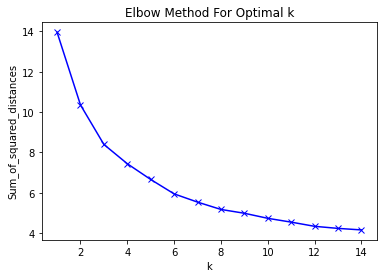

In [154]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

K = 6 is optimal

In [182]:
k = 6
toronto_grouped_clustering = toronto_crime19_onehot.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=k, random_state=0).fit(toronto_grouped_clustering)
kmeans.labels_[0:10]

array([1, 0, 3, 0, 1, 3, 4, 1, 3, 1], dtype=int32)

In [183]:
neighborhoods_crime_sorted.shape

(140, 12)

In [184]:
neighborhoods_crime_sorted.drop('Cluster Labels', axis=1, inplace=True)

#### Create a new dataframe that includes the cluster as well as the top 10 crime incidents for each neighborhood.

In [185]:
neighborhoods_crime_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = toronto_crime_venues
toronto_merged = toronto_merged.join(neighborhoods_crime_sorted.set_index('Neighbourhood'), on='Neighborhood')
toronto_merged.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Trinity Bellwoods              43.646683              -79.406578   
1  Trinity Bellwoods              43.646683              -79.406578   
2  Trinity Bellwoods              43.646683              -79.406578   
3  Trinity Bellwoods              43.646683              -79.406578   
4  Trinity Bellwoods              43.646683              -79.406578   

                        Venue  Venue Latitude  Venue Longitude  \
0  North of Brooklyn Pizzeria       43.646945       -79.406561   
1                     Soufi's       43.646553       -79.407339   
2                 Frank & Oak       43.646579       -79.406655   
3                        Neat       43.646895       -79.405688   
4                        ZANE       43.646435       -79.407390   

              Venue Category  \
0                Pizza Place   
1  Middle Eastern Restaurant   
2             Clothing Store   
3     Furniture / Home Store   
4          Accessories Store   

                                      Crime Category  Cluster Labels  \
0                                       Assault, B&E               0   
1  B&E, Assault, Theft Of Motor Vehicle, Theft Of...               0   
2                             Theft Of Motor Vehicle               0   
3                             Robbery - Purse Snatch               0   
4      Assault, B&E, Assault, Theft Of Motor Vehicle               0   

  1st Most Common Crimes 2nd Most Common Crimes 3rd Most Common Crimes  \
0                Assault                    B&E                Assault   
1                Assault                    B&E                Assault   
2                Assault                    B&E                Assault   
3                Assault                    B&E                Assault   
4                Assault                    B&E                Assault   

  4th Most Common Crime    5th Most Common Crime 6th Most Common Crime  \
0                   B&E   Theft Of Motor Vehicle   Assault With Weapon   
1                   B&E   Theft Of Motor Vehicle   Assault With Weapon   
2                   B&E   Theft Of Motor Vehicle   Assault With Weapon   
3                   B&E   Theft Of Motor Vehicle   Assault With Weapon   
4                   B&E   Theft Of Motor Vehicle   Assault With Weapon   

  7th Most Common Crime 8th Most Common Crime   9th Most Common Crime  \
0   Assault With Weapon     Robbery - Mugging  Theft Of Motor Vehicle   
1   Assault With Weapon     Robbery - Mugging  Theft Of Motor Vehicle   
2   Assault With Weapon     Robbery - Mugging  Theft Of Motor Vehicle   
3   Assault With Weapon     Robbery - Mugging  Theft Of Motor Vehicle   
4   Assault With Weapon     Robbery - Mugging  Theft Of Motor Vehicle   

  10th Most Common Crime  
0           B&E W'Intent  
1           B&E W'Intent  
2           B&E W'Intent  
3           B&E W'Intent  
4           B&E W'Intent

### 5. Visualize the resulting clusters

In [186]:
map_clusters = folium.Map(location=[latitude_x, longitude_x], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, crime in zip(toronto_merged['Neighborhood Latitude'], toronto_merged['Neighborhood Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels'], toronto_merged['Crime Category']):
    label = folium.Popup(str(poi) + ' | ' + 'Cluster :' + str(cluster) + ' | ' +str(crime), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

Now, we can examine each cluster and determine the discriminating crime categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster.

#### Cluster 1

In [199]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[0] + list(range(3, toronto_merged.shape[1]))]]

Neighborhood                       Venue  \
0                       Trinity Bellwoods  North of Brooklyn Pizzeria   
1                       Trinity Bellwoods                     Soufi's   
2                       Trinity Bellwoods                 Frank & Oak   
3                       Trinity Bellwoods                        Neat   
4                       Trinity Bellwoods                        ZANE   
...                                   ...                         ...   
1946  Dovercourt Wallace Emerson Junction                  Lynx Music   
1947  Dovercourt Wallace Emerson Junction     Jomar Electric Co. Ltd.   
1954                          Regent Park      Sumach-Shuter Parkette   
1969                           University    TTC #506 Replacement Bus   
1970                           University         Robert Gill Theatre   

      Venue Latitude  Venue Longitude             Venue Category  \
0          43.646945       -79.406561                Pizza Place   
1          43.646553       -79.407339  Middle Eastern Restaurant   
2          43.646579       -79.406655             Clothing Store   
3          43.646895       -79.405688     Furniture / Home Store   
4          43.646435       -79.407390          Accessories Store   
...              ...              ...                        ...   
1946       43.667425       -79.444994           Recording Studio   
1947       43.667360       -79.444795          Electronics Store   
1954       43.658490       -79.358692                 Playground   
1969       43.659923       -79.396880              Moving Target   
1970       43.659571       -79.397050                    Theater   

                                         Crime Category  Cluster Labels  \
0                                          Assault, B&E               0   
1     B&E, Assault, Theft Of Motor Vehicle, Theft Of...               0   
2                                Theft Of Motor Vehicle               0   
3                                Robbery - Purse Snatch               0   
4         Assault, B&E, Assault, Theft Of Motor Vehicle               0   
...                                                 ...             ...   
1946                                            Assault               0   
1947  B&E, Assault, Theft Of Motor Vehicle, Theft Of...               0   
1954  Unlawfully In Dwelling-House, Assault Peace Of...               0   
1969                                   Assault, Assault               0   
1970                              B&E, Assault, Assault               0   

     1st Most Common Crimes 2nd Most Common Crimes 3rd Most Common Crimes  \
0                   Assault                    B&E                Assault   
1                   Assault                    B&E                Assault   
2                   Assault                    B&E                Assault   
3                   Assault                    B&E                Assault   
4                   Assault                    B&E                Assault   
...                     ...                    ...                    ...   
1946                Assault                    B&E                    B&E   
1947                Assault                    B&E                    B&E   
1954                Assault                    B&E                    B&E   
1969                    B&E                Assault                    B&E   
1970                    B&E                Assault                    B&E   

     4th Most Common Crime    5th Most Common Crime    6th Most Common Crime  \
0                      B&E   Theft Of Motor Vehicle      Assault With Weapon   
1                      B&E   Theft Of Motor Vehicle      Assault With Weapon   
2                      B&E   Theft Of Motor Vehicle      Assault With Weapon   
3                      B&E   Theft Of Motor Vehicle      Assault With Weapon   
4                      B&E   Theft Of Motor Vehicle      Assault With Weapon   
...                    ...   

#### Cluster 2

In [204]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[0] + list(range(3, toronto_merged.shape[1]))]]

Neighborhood                            Venue  \
42    Islington City Centre West             Rocket Fireworks Inc   
43    Islington City Centre West         Parker Bros. Powersports   
44    Islington City Centre West                Buns Masterbakery   
45    Islington City Centre West                          Mezgouf   
73    Islington City Centre West                          Mingles   
...                          ...                              ...   
1963                     Steeles                       Pizza Nova   
1964                     Steeles               Ookinza Fish House   
1965                     Steeles                       McDonald's   
1966                     Steeles  Bamburgh Gardens Shopping Plaza   
1971            Newtonbrook East         Bishop Allotment gardens   

      Venue Latitude  Venue Longitude             Venue Category  \
42         43.633397       -79.530870            Fireworks Store   
43         43.633581       -79.531503            Motorcycle Shop   
44         43.633880       -79.531686                     Bakery   
45         43.633695       -79.531606  Middle Eastern Restaurant   
73         43.626827       -79.528617                  Nightclub   
...              ...              ...                        ...   
1963       43.815597       -79.323145                Pizza Place   
1964       43.815947       -79.322822           Sushi Restaurant   
1965       43.815943       -79.323097       Fast Food Restaurant   
1966       43.815779       -79.323235              Shopping Mall   
1971       43.785520       -79.400271                       Park   

                                         Crime Category  Cluster Labels  \
42                               Theft Of Motor Vehicle               1   
43                 Assault, B&E, Theft Of Motor Vehicle               1   
44    B&E, Robbery - Mugging, Robbery - Mugging, Rob...               1   
45                                              Assault               1   
73                                                  B&E               1   
...                                                 ...             ...   
1963  Assault, Theft Of Motor Vehicle, Theft Of Moto...               1   
1964              Robbery - Home Invasion, B&E W'Intent               1   
1965                                            Assault               1   
1966  Assault With Weapon, Assault With Weapon, Assa...               1   
1971                                                B&E               1   

     1st Most Common Crimes   2nd Most Common Crimes   3rd Most Common Crimes  \
42                      B&E   Theft Of Motor Vehicle                  Assault   
43                      B&E   Theft Of Motor Vehicle                  Assault   
44                      B&E   Theft Of Motor Vehicle                  Assault   
45                      B&E   Theft Of Motor Vehicle                  Assault   
73                      B&E   Theft Of Motor Vehicle                  Assault   
...                     ...                      ...                      ...   
1963                    B&E   Theft Of Motor Vehicle                      B&E   
1964                    B&E   Theft Of Motor Vehicle                      B&E   
1965                    B&E   Theft Of Motor Vehicle                      B&E   
1966                    B&E   Theft Of Motor Vehicle                      B&E   
1971                    B&E                  Assault   Theft Of Motor Vehicle   

       4th Most Common Crime   5th Most Common Crime 6th Most Common Crime  \
42                   Assault  Theft Of Motor Vehicle                   B&E   
43                   Assault  Theft Of Motor Vehicle                   B&E   
44                   Assault  Theft Of Motor Vehicle                   B&E   
45                   Assault  Theft Of Motor Vehicle                   B&E   
73                   Assault  Theft Of Motor Vehicle                   B&E   
...                      ...    

#### Cluster 3

In [205]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[0] + list(range(3, toronto_merged.shape[1]))]]

Neighborhood                             Venue  \
29                 Rexdale Kipling                     Country Style   
157                     Maple Leaf                       Tim Hortons   
164                     Humbermede       Costandson Construction Ltd   
196   Thistletown Beaumond Heights                  Caribbean Heat 2   
399                  Humber Summit                        Hakka No.1   
400                  Humber Summit                     Country Style   
401                  Humber Summit       Pupuseria Salvadorena Grill   
416         West Humber Clairville                      Diva's World   
677                     Humbermede                 Tenren's Tea Time   
678                     Humbermede                       Thuy's Shop   
722                     Maple Leaf                     Rustic Bakery   
734                Rexdale Kipling                  Faley Restaurant   
735                Rexdale Kipling         Solarium Cafe Bar & Grill   
736                Rexdale Kipling                     Hakka Cottage   
794                Rexdale Kipling            Chubby's Fish N' Chips   
795                Rexdale Kipling         Habib's Islamic Bookstore   
827   Thistletown Beaumond Heights  Thistletown Multi Service Centre   
862                  Humber Summit                       Tim Hortons   
863                  Humber Summit                Sharks Sports Club   
876         West Humber Clairville                  Martingrove Mall   
884         West Humber Clairville             Enterprise Rent-A-Car   
983         West Humber Clairville                   Naked Furniture   
1134        West Humber Clairville                       Tim Hortons   
1135        West Humber Clairville                               KFC   
1136        West Humber Clairville                         Taco Bell   
1214                 Humber Summit                       Pizza Monza   
1249                    Humbermede                       Tim Hortons   
1254          Pelmo Park Humberlea                Joseph Bannon Park   
1282          Pelmo Park Humberlea                  Reliable Air Inc   
1283          Pelmo Park Humberlea                     Efficient Air   
1284          Pelmo Park Humberlea                     Efficient Air   
1410          Pelmo Park Humberlea               U-Haul at Weston Rd   
1419                 Humber Summit                       Coffee Time   
1443        West Humber Clairville                          Kal Tire   
1540                 Humber Summit                      Capri Bakery   
1541                 Humber Summit                    Islington Park   
1542                 Humber Summit                     Plunkett park   
1543               Rexdale Kipling                       Tim Hortons   
1544               Rexdale Kipling                       Tim Hortons   
1545               Rexdale Kipling                          Stitches   
1546               Rexdale Kipling                             Mac's   
1603                        Rustic                      Petro-Canada   
1604                        Rustic                        McDonald's   
1605                        Rustic      Sunrise Caribbean Restaurant   
1606          Pelmo Park Humberlea                       Tim Hortons   
1814        West Humber Clairville                   Smithfield Park   
1815        West Humber Clairville                       Colony Park   
1816        West Humber Clairville                    Plowshare Park   
1817        West Humber Clairville                      Pattie World   
1903                    Humbermede                            Subway   
1904                    Humbermede         Caribbean Queen Jerk Drum   
1905                    Humbermede                        Pizza Nova   

      Venue Latitude  Venue Longitude              Venue Category  \
29         43.728535       -79.574407                 Coffee Shop   
157        43.719431       -79.480723                 Coffee Shop  

#### Cluster 4

In [206]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[0] + list(range(3, toronto_merged.shape[1]))]]

Neighborhood                  Venue  \
28               Humber Heights Westmount              Bg Moving   
30    Mimico (includes Humber Bay Shores)        Egglicious Cafe   
31    Mimico (includes Humber Bay Shores)            Tim Hortons   
93                        Oakwood Village       Oakwood Pizzeria   
94                       Elms Old Rexdale       Pine Point Arena   
...                                   ...                    ...   
1951                  Brookhaven Amesbury            Mama's Tofu   
1952                   Danforth East York      Dance Kids Canada   
1953                   Danforth East York         TTC Stop #8913   
1955                     Elms Old Rexdale  Golan Moulding Design   
1956                     Elms Old Rexdale   Design Exteriors Inc   

      Venue Latitude  Venue Longitude                 Venue Category  \
28         43.689117       -79.518072         Furniture / Home Store   
30         43.606485       -79.520693                 Breakfast Spot   
31         43.606077       -79.520600                    Coffee Shop   
93         43.689127       -79.439415                    Pizza Place   
94         43.712899       -79.542861                   Skating Rink   
...              ...              ...                            ...   
1951       43.704929       -79.492927  Vegetarian / Vegan Restaurant   
1952       43.696563       -79.317385                   Dance Studio   
1953       43.696486       -79.317577                       Bus Stop   
1955       43.721153       -79.545384     Construction & Landscaping   
1956       43.721607       -79.545395     Construction & Landscaping   

                                         Crime Category  Cluster Labels  \
28                                         B&E, Assault               3   
30                               Theft Of Motor Vehicle               3   
31                                     Assault, Assault               3   
93                                                  B&E               3   
94                                                  B&E               3   
...                                                 ...             ...   
1951  Assault, Theft From Motor Vehicle Over, Assaul...               3   
1952         Robbery - Other, Assault, Assault, Assault               3   
1953                            Robbery - Swarming, B&E               3   
1955                                       B&E W'Intent               3   
1956                                         Theft Over               3   

     1st Most Common Crimes   2nd Most Common Crimes   3rd Most Common Crimes  \
28                  Assault                      B&E   Theft Of Motor Vehicle   
30                  Assault                      B&E                  Assault   
31                  Assault                      B&E                  Assault   
93                  Assault                  Assault                      B&E   
94                  Assault                  Assault   Theft Of Motor Vehicle   
...                     ...                      ...                      ...   
1951                Assault   Theft Of Motor Vehicle                  Assault   
1952                Assault                  Assault                      B&E   
1953                Assault                  Assault                      B&E   
1955                Assault                  Assault   Theft Of Motor Vehicle   
1956                Assault                  Assault   Theft Of Motor Vehicle   

        4th Most Common Crime    5th Most Common Crime  \
28                    Assault   Theft Of Motor Vehicle   
30     Theft Of Motor Vehicle                      B&E   
31     Theft Of Motor Vehicle                      B&E   
93                        B&E   Theft Of Motor Vehicle   
94     Theft Of Motor Vehicle      Assault With Weapon   
...                       ...                      ...   
1951                      B&E                      B&E   
1952     

#### Cluster 5

In [207]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[0] + list(range(3, toronto_merged.shape[1]))]]

Neighborhood                         Venue  Venue Latitude  \
104              Moss Park            Smoke's Poutinerie       43.657379   
105              Moss Park                     Shisha&Co       43.656748   
106              Moss Park                     Pizza Hut       43.657088   
145              Moss Park             Sultan Of Samosas       43.660227   
146              Moss Park                   Tim Hortons       43.659930   
...                    ...                           ...             ...   
1941  Kensington Chinatown  Coffee Culture Cafe & Eatery       43.656705   
1942  Kensington Chinatown                        Subway       43.657016   
1943  Kensington Chinatown                       Nirvana       43.656616   
1944  Kensington Chinatown                    Bistro 422       43.656681   
1945  Kensington Chinatown           Toby's Pub & Eatery       43.656577   

      Venue Longitude     Venue Category  \
104        -79.373455      Poutine Place   
105        -79.374337         Smoke Shop   
106        -79.374123        Pizza Place   
145        -79.366226  Indian Restaurant   
146        -79.365980        Coffee Shop   
...               ...                ...   
1941       -79.406535        Coffee Shop   
1942       -79.405358     Sandwich Place   
1943       -79.407241         Restaurant   
1944       -79.406975           Dive Bar   
1945       -79.406713                Bar   

                                         Crime Category  Cluster Labels  \
104   Assault, B&E W'Intent, Assault, Assault, Assau...               4   
105                                                 B&E               4   
106                                 Assault With Weapon               4   
145   Assault, Robbery - Vehicle Jacking, Robbery - ...               4   
146                                        B&E W'Intent               4   
...                                                 ...             ...   
1941  Assault, Assault, Assault, Assault, Assault, R...               4   
1942  Assault With Weapon, B&E W'Intent, Theft Of Mo...               4   
1943                                            Assault               4   
1944                                            Assault               4   
1945                                                B&E               4   

     1st Most Common Crimes 2nd Most Common Crimes 3rd Most Common Crimes  \
104                 Assault                    B&E                    B&E   
105                 Assault                    B&E                    B&E   
106                 Assault                    B&E                    B&E   
145                 Assault                    B&E                    B&E   
146                 Assault                    B&E                    B&E   
...                     ...                    ...                    ...   
1941                    B&E                Assault                    B&E   
1942                    B&E                Assault                    B&E   
1943                    B&E                Assault                    B&E   
1944                    B&E                Assault                    B&E   
1945                    B&E                Assault                    B&E   

     4th Most Common Crime    5th Most Common Crime    6th Most Common Crime  \
104    Assault With Weapon   Theft Of Motor Vehicle                  Assault   
105    Assault With Weapon   Theft Of Motor Vehicle                  Assault   
106    Assault With Weapon   Theft Of Motor Vehicle                  Assault   
145    Assault With Weapon   Theft Of Motor Vehicle                  Assault   
146    Assault With Weapon   Theft Of Motor Vehicle                  Assault   
...                    ...                      ...                      ...   
1941               Assault      Assault With Weapon   Theft Of Motor Vehicle   
1942               Assault      Assault With Weapon   Theft Of Motor Vehicle   
1943               Assault

#### Cluster 6

In [208]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[0] + list(range(3, toronto_merged.shape[1]))]]

Neighborhood                                         Venue  \
27                    Malvern                       Toronto Custom T-Shirts   
63               Mount Dennis                                Shilla Dynasty   
64               Mount Dennis                                Domino's Pizza   
65          East End Danforth             Maple Leaf Dairy Ice Cream Parlor   
66          East End Danforth                           Mr Tasty's Drive In   
...                       ...                                           ...   
1959        East End Danforth                    Main St. and Danforth Ave.   
1960        East End Danforth  Danforth Village Quality Fruits & Vegetables   
1961        East End Danforth                           Grumble's deli-cafe   
1967  Beechborough Greenbrook                                Z Bar & Grille   
1968  Beechborough Greenbrook                                     El Nahual   

      Venue Latitude  Venue Longitude     Venue Category  \
27         43.805389       -79.207488     Clothing Store   
63         43.687268       -79.489840  Korean Restaurant   
64         43.687701       -79.491753        Pizza Place   
65         43.689677       -79.294779     Ice Cream Shop   
66         43.689726       -79.293727       Burger Joint   
...              ...              ...                ...   
1959       43.687233       -79.301848               Road   
1960       43.687844       -79.302278      Grocery Store   
1961       43.687581       -79.301735             Bakery   
1967       43.690673       -79.472764                Bar   
1968       43.690763       -79.473799         Restaurant   

                                         Crime Category  Cluster Labels  \
27                                                  B&E               5   
63                                         Assault, B&E               5   
64       Theft Of Motor Vehicle, Theft Of Motor Vehicle               5   
65    Assault With Weapon, Robbery - Other, Robbery ...               5   
66                                    Robbery - Mugging               5   
...                                                 ...             ...   
1959  Assault With Weapon, Assault, Assault With Wea...               5   
1960                                   Assault, Assault               5   
1961  B&E W'Intent, Robbery - Business, Robbery - Bu...               5   
1967                        B&E, Theft Of Motor Vehicle               5   
1968                                  Robbery - Mugging               5   

     1st Most Common Crimes   2nd Most Common Crimes   3rd Most Common Crimes  \
27                  Assault                  Assault   Theft Of Motor Vehicle   
63                  Assault                  Assault   Theft Of Motor Vehicle   
64                  Assault                  Assault   Theft Of Motor Vehicle   
65                  Assault                  Assault                      B&E   
66                  Assault                  Assault                      B&E   
...                     ...                      ...                      ...   
1959                Assault                  Assault                      B&E   
1960                Assault                  Assault                      B&E   
1961                Assault                  Assault                      B&E   
1967                Assault   Theft Of Motor Vehicle                  Assault   
1968                Assault   Theft Of Motor Vehicle                  Assault   

     4th Most Common Crime 5th Most Common Crime   6th Most Common Crime  \
27     Assault With Weapon   Assault With Weapon  Theft Of Motor Vehicle   
63     Assault With Weapon                   B&E  Theft Of Motor Vehicle   
64     Assault With Weapon                   B&E  Theft Of Motor Vehicle   
65     Assault With Weapon                   B&E     Assault With Weapon   
66     Assault With Weapon                   B&E     Assault With Weapon   
...              